<a href="https://colab.research.google.com/github/quaziharis/E-Commerce/blob/master/ecommersefinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt
from collections import Counter
#scikit learn  library
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
#Use LogisticRegression for classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#oversampling
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
dataset = pd.read_csv('/content/train_8wry4cB.csv')
dataset_test = pd.read_csv('/content/test_Yix80N0.csv')

In [0]:
def extract_product(str):
    if ";"  in str:
        prd_lst = str.split(";")
        count_item = len(prd_lst)
        first_lv1 = prd_lst[0].split("/")[0]
        first_lv2 = prd_lst[0].split("/")[1]
        lv1_lst =[]
        lv2_lst =[]
        for item in prd_lst:
            lv1_lst.append(item.split("/")[0])
            lv2_lst.append(item.split("/")[1])
        unique_lv1 = len(set(lv1_lst))
        unique_lv2 = len(set(lv2_lst))
        most_freq_lv1 =  max(lv1_lst, key=Counter(lv1_lst).get)        
    else:
        lv_lst = str.split("/")
        first_lv1 = lv_lst[0]
        first_lv2 = lv_lst[1]
        count_item = 1
        unique_lv1 = 1
        unique_lv2 = 1
        most_freq_lv1 = first_lv1
    return (count_item,first_lv1,first_lv2,unique_lv1,unique_lv2,most_freq_lv1)    

#Feature Extraction :
new_col = ('NumProduct','FirstA','FirstB','UniqueA','UniqueB','MostA')      
new_col_lst = dataset['ProductList'].apply(lambda x: extract_product(x))    
new_col_df = pd.DataFrame(new_col_lst.tolist(),columns =new_col)

data = pd.concat([dataset, new_col_df], axis=1)
# Time feature extraction
data['startTime'] = pd.to_datetime(data['startTime'])
data['endTime'] = pd.to_datetime(data['endTime'])
data['duration'] = data['endTime'] - data['startTime']
data['duration'] = data['duration'].astype('timedelta64[m]')
data['weekday'] = data['startTime'].dt.dayofweek
data['hour_24h'] = data['startTime'].dt.hour

drop_lst = ['session_id', 'startTime', 'endTime', 'ProductList']

data = data.drop(drop_lst,axis =1 )
print(data.head())

   gender  NumProduct  FirstA  FirstB  ...   MostA  duration weekday  hour_24h
0  female           4  A00002  B00003  ...  A00002       1.0       0        18
1    male           7  A00001  B00009  ...  A00001       6.0       1        14
2  female           1  A00002  B00001  ...  A00002       0.0       6        15
3  female           3  A00002  B00004  ...  A00002       3.0       6         2
4    male           2  A00001  B00001  ...  A00001       2.0       2        16

[5 rows x 10 columns]


In [0]:
data.head()

,NumProduct,UniqueA,UniqueB,duration,weekday,hour_24h,gender_female,gender_male,FirstA_A00001,FirstA_A00002,FirstA_A00003,FirstA_A00004,FirstA_A00005,FirstA_A00006,FirstA_A00007,FirstA_A00008,FirstA_A00009,FirstA_A00010,FirstA_A00011,FirstB_B00001,FirstB_B00002,FirstB_B00003,FirstB_B00004,FirstB_B00005,FirstB_B00006,FirstB_B00007,FirstB_B00008,FirstB_B00009,FirstB_B00010,FirstB_B00011,FirstB_B00012,FirstB_B00013,FirstB_B00014,FirstB_B00015,FirstB_B00016,FirstB_B00017,FirstB_B00018,FirstB_B00019,FirstB_B00020,FirstB_B00021,...,FirstB_B00054,FirstB_B00055,FirstB_B00056,FirstB_B00057,FirstB_B00058,FirstB_B00059,FirstB_B00060,FirstB_B00061,FirstB_B00062,FirstB_B00063,FirstB_B00064,FirstB_B00065,FirstB_B00066,FirstB_B00067,FirstB_B00069,FirstB_B00070,FirstB_B00071,FirstB_B00072,FirstB_B00073,FirstB_B00074,FirstB_B00075,FirstB_B00076,FirstB_B00077,FirstB_B00078,FirstB_B00079,FirstB_B00080,FirstB_B00082,FirstB_B00083,FirstB_B00085,MostA_A00001,MostA_A00002,MostA_A00003,MostA_A00004,MostA_A00005,MostA_A00006,MostA_A00007,MostA_A00008,MostA_A00009,MostA_A00010,MostA_A00011
0,4,1,1,1.0,0,18,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,7,1,1,6.0,1,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0.0,6,15,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,1,1,3.0,6,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2,1,1,2.0,2,16,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
data = pd.get_dummies(data)


In [0]:
data = data.drop(['gender_female','gender_male'],axis=1)

In [0]:
x = data
y = dataset['gender'].map({'female':0,'male':1})

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, shuffle = True)
from sklearn.linear_model import LinearRegression
eng_model = RandomForestClassifier().fit(xtrain, ytrain)

#Feature selection using RFE
from sklearn.feature_selection import RFE
selector = RFE(eng_model, 20, step=1)
selector = selector.fit(x,y)
l1 = selector.ranking_
l2 = x.columns
for i in zip(l1,l2):
  print(i)

(1, 'NumProduct')
(1, 'UniqueA')
(1, 'UniqueB')
(1, 'duration')
(1, 'weekday')
(1, 'hour_24h')
(1, 'FirstA_A00001')
(1, 'FirstA_A00002')
(1, 'FirstA_A00003')
(1, 'FirstA_A00004')
(19, 'FirstA_A00005')
(8, 'FirstA_A00006')
(53, 'FirstA_A00007')
(17, 'FirstA_A00008')
(47, 'FirstA_A00009')
(15, 'FirstA_A00010')
(24, 'FirstA_A00011')
(1, 'FirstB_B00001')
(2, 'FirstB_B00002')
(4, 'FirstB_B00003')
(1, 'FirstB_B00004')
(16, 'FirstB_B00005')
(25, 'FirstB_B00006')
(7, 'FirstB_B00007')
(87, 'FirstB_B00008')
(1, 'FirstB_B00009')
(40, 'FirstB_B00010')
(14, 'FirstB_B00011')
(1, 'FirstB_B00012')
(20, 'FirstB_B00013')
(13, 'FirstB_B00014')
(1, 'FirstB_B00015')
(9, 'FirstB_B00016')
(18, 'FirstB_B00017')
(65, 'FirstB_B00018')
(34, 'FirstB_B00019')
(38, 'FirstB_B00020')
(39, 'FirstB_B00021')
(12, 'FirstB_B00022')
(68, 'FirstB_B00023')
(56, 'FirstB_B00024')
(43, 'FirstB_B00025')
(6, 'FirstB_B00026')
(30, 'FirstB_B00027')
(31, 'FirstB_B00028')
(49, 'FirstB_B00029')
(59, 'FirstB_B00030')
(1, 'FirstB_B00031

In [0]:
data.columns

Index(['NumProduct', 'UniqueA', 'UniqueB', 'duration', 'weekday', 'hour_24h',
       'FirstA_A00001', 'FirstA_A00002', 'FirstA_A00003', 'FirstA_A00004',
       ...
       'MostA_A00002', 'MostA_A00003', 'MostA_A00004', 'MostA_A00005',
       'MostA_A00006', 'MostA_A00007', 'MostA_A00008', 'MostA_A00009',
       'MostA_A00010', 'MostA_A00011'],
      dtype='object', length=110)

In [0]:
x = data[['NumProduct','UniqueA', 'UniqueB', 'duration', 'weekday', 'hour_24h', 'FirstA_A00001', 'FirstA_A00002', 'FirstA_A00003', 'FirstA_A00004','FirstB_B00001','FirstB_B00004','FirstB_B00009','FirstB_B00012','FirstB_B00015','FirstB_B00031', 'MostA_A00001','MostA_A00002','MostA_A00003', 'MostA_A00004']]
y = dataset['gender'].map({'female':0,'male':1})

In [0]:
val_size = 0.25
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=val_size)


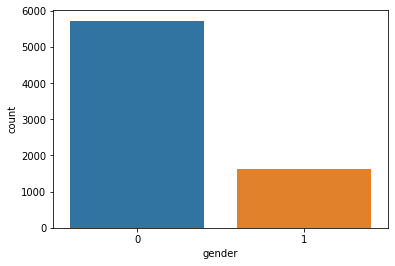

In [0]:
sn.countplot('gender',data=ytrain)

In [0]:
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy='minority')
xtrain, ytrain = over_sample.fit_resample(xtrain, ytrain)

In [0]:
clf = LogisticRegression(class_weight = {1:.1, 0:.35})
#Version 2: Using Random Forest instead Logistric Regression
clf = RandomForestClassifier(class_weight = {1:.1, 0:.35})
clf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.35, 1: 0.1}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred=clf.predict(xtest)
print("f1 : " + " %s" % f1_score(ytest, y_pred))
print("accuracy score" + " %s" % accuracy_score(ytest, y_pred))
print("recall score micro: " + " %s" % recall_score(ytest, y_pred, average='micro'))
print("recall score macro: " + " %s" % recall_score(ytest, y_pred, average='macro'))



f1 :  0.5872093023255814
accuracy score 0.8377142857142857
recall score micro:  0.8377142857142857
recall score macro:  0.7377128020720698


In [0]:
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

  adaboost_clf = AdaBoostClassifier()
  adaboost_clf.fit(xtrain,ytrain)

  print("\n\n **AdaBoost Classifier**\n")
  print('training:',adaboost_clf.score(xtrain,ytrain))
  print('test:',adaboost_clf.score(xtest,ytest)) 
     
  y_pred = adaboost_clf.predict(xtest)

  from sklearn.metrics import precision_recall_fscore_support
  print('precision_recall_fscore_support\n',precision_recall_fscore_support(ytest, y_pred, average=None),'\n')

  from sklearn.metrics import classification_report
  print('classification_report\n',classification_report(ytest,y_pred),'\n')

  from sklearn.metrics import confusion_matrix
  print('confusion_matrix\n',confusion_matrix(ytest,y_pred))

  



 **AdaBoost Classifier**

training: 0.7670012953367875
test: 0.8647619047619047
precision_recall_fscore_support
 (array([0.88972313, 0.75708502]), array([0.94047619, 0.61412151]), array([0.91439595, 0.6781505 ]), array([2016,  609])) 

classification_report
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      2016
           1       0.76      0.61      0.68       609

    accuracy                           0.86      2625
   macro avg       0.82      0.78      0.80      2625
weighted avg       0.86      0.86      0.86      2625
 

confusion_matrix
 [[1896  120]
 [ 235  374]]


In [0]:
  from sklearn.neighbors import KNeighborsClassifier
  knn= KNeighborsClassifier(n_neighbors=3).fit(xtrain,ytrain)
  
  print("\n\n **KNN Classifier**\n")
  print('training:',knn.score(xtrain,ytrain))
  print('test:',knn.score(xtest,ytest)) 
     
  y_pred = knn.predict(xtest)

  from sklearn.metrics import precision_recall_fscore_support
  print('precision_recall_fscore_support\n',precision_recall_fscore_support(ytest, y_pred, average=None),'\n')

  from sklearn.metrics import classification_report
  print('classification_report\n',classification_report(ytest,y_pred),'\n')

  from sklearn.metrics import confusion_matrix
  print('confusion_matrix\n',confusion_matrix(ytest,y_pred))



 **KNN Classifier**

training: 0.9021970814887686
test: 0.7817142857142857
precision_recall_fscore_support
 (array([0.88617886, 0.46879756]), array([0.8332537 , 0.57894737]), array([0.85890175, 0.51808242]), array([2093,  532])) 

classification_report
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      2093
           1       0.47      0.58      0.52       532

    accuracy                           0.78      2625
   macro avg       0.68      0.71      0.69      2625
weighted avg       0.80      0.78      0.79      2625
 

confusion_matrix
 [[1744  349]
 [ 224  308]]


In [0]:
  from sklearn.ensemble import GradientBoostingClassifier
  gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=3, random_state=0).fit(xtrain, ytrain)

  print('Accuracy of training set: ',gb_model.score(xtrain, ytrain))
  print('Accuracy of test set: ',gb_model.score(xtest, ytest))

  y_pred = gb_model.predict(xtest)

  from sklearn.metrics import classification_report
  print('classification_report\n',classification_report(ytest,y_pred),'\n')

  from sklearn.metrics import confusion_matrix
  print('confusion_matrix\n',confusion_matrix(ytest,y_pred))

Accuracy of training set:  0.7745304404145078
Accuracy of test set:  0.8556190476190476
classification_report
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      2016
           1       0.72      0.63      0.67       609

    accuracy                           0.86      2625
   macro avg       0.80      0.78      0.79      2625
weighted avg       0.85      0.86      0.85      2625
 

confusion_matrix
 [[1864  152]
 [ 227  382]]


In [0]:
pd.DataFrame(y_pred).to_csv("GB_pred.csv")


In [0]:
pd.DataFrame(ytest).to_csv("ytest.csv")


In [0]:
pd.DataFrame(y_pred).to_csv("y_pred.csv")


In [0]:
dataset_test = pd.read_csv('/content/test_Yix80N0.csv')

In [0]:
def extract_product(str):
    if ";"  in str:
        prd_lst = str.split(";")
        count_item = len(prd_lst)
        first_lv1 = prd_lst[0].split("/")[0]
        first_lv2 = prd_lst[0].split("/")[1]
        lv1_lst =[]
        lv2_lst =[]
        for item in prd_lst:
            lv1_lst.append(item.split("/")[0])
            lv2_lst.append(item.split("/")[1])
        unique_lv1 = len(set(lv1_lst))
        unique_lv2 = len(set(lv2_lst))
        most_freq_lv1 =  max(lv1_lst, key=Counter(lv1_lst).get)        
    else:
        lv_lst = str.split("/")
        first_lv1 = lv_lst[0]
        first_lv2 = lv_lst[1]
        count_item = 1
        unique_lv1 = 1
        unique_lv2 = 1
        most_freq_lv1 = first_lv1
    return (count_item,first_lv1,first_lv2,unique_lv1,unique_lv2,most_freq_lv1)    

#Feature Extraction :
new_col_test = ('NumProduct','FirstA','FirstB','UniqueA','UniqueB','MostA')      
new_col_lst_test = dataset_test['ProductList'].apply(lambda x: extract_product(x))    
new_col_test = pd.DataFrame(new_col_lst_test.tolist(),columns =new_col_test)

data_test = pd.concat([dataset_test, new_col_test], axis=1)
# Time feature extraction
data_test['startTime'] = pd.to_datetime(data_test['startTime'])
data_test['endTime'] = pd.to_datetime(data_test['endTime'])
data_test['duration'] = data_test['endTime'] - data_test['startTime']
data_test['duration'] = data_test['duration'].astype('timedelta64[m]')
data_test['weekday'] = data_test['startTime'].dt.dayofweek
data_test['hour_24h'] = data_test['startTime'].dt.hour

drop_lst = ['session_id', 'startTime', 'endTime', 'ProductList']

data_test = data_test.drop(drop_lst,axis =1 )
print(data_test.head())

   NumProduct  FirstA  FirstB  UniqueA  ...   MostA duration  weekday  hour_24h
0           1  A00002  B00003        1  ...  A00002      0.0        1        13
1           1  A00002  B00005        1  ...  A00002      0.0        4        13
2           1  A00002  B00002        1  ...  A00002      0.0        6        10
3           4  A00002  B00003        1  ...  A00002      3.0        1        20
4           1  A00002  B00001        1  ...  A00002      0.0        0        19

[5 rows x 9 columns]


In [0]:
data_test = pd.get_dummies(data_test)


In [0]:
data_test.head()

,NumProduct,UniqueA,UniqueB,duration,weekday,hour_24h,FirstA_A00001,FirstA_A00002,FirstA_A00003,FirstA_A00004,FirstA_A00005,FirstA_A00006,FirstA_A00007,FirstA_A00008,FirstA_A00009,FirstA_A00010,FirstA_A00011,FirstB_B00001,FirstB_B00002,FirstB_B00003,FirstB_B00004,FirstB_B00005,FirstB_B00006,FirstB_B00007,FirstB_B00009,FirstB_B00010,FirstB_B00011,FirstB_B00012,FirstB_B00013,FirstB_B00014,FirstB_B00015,FirstB_B00016,FirstB_B00017,FirstB_B00018,FirstB_B00019,FirstB_B00020,FirstB_B00021,FirstB_B00022,FirstB_B00023,FirstB_B00024,...,FirstB_B00045,FirstB_B00046,FirstB_B00047,FirstB_B00048,FirstB_B00049,FirstB_B00050,FirstB_B00051,FirstB_B00053,FirstB_B00054,FirstB_B00055,FirstB_B00056,FirstB_B00057,FirstB_B00058,FirstB_B00060,FirstB_B00061,FirstB_B00062,FirstB_B00063,FirstB_B00065,FirstB_B00066,FirstB_B00067,FirstB_B00069,FirstB_B00070,FirstB_B00071,FirstB_B00072,FirstB_B00075,FirstB_B00077,FirstB_B00079,FirstB_B00088,FirstB_B00091,MostA_A00001,MostA_A00002,MostA_A00003,MostA_A00004,MostA_A00005,MostA_A00006,MostA_A00007,MostA_A00008,MostA_A00009,MostA_A00010,MostA_A00011
0,1,1,1,0.0,1,13,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,1,1,0.0,4,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,1,1,0.0,6,10,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,4,1,1,3.0,1,20,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,1,1,0.0,0,19,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [0]:
data_test.isnull().sum()

NumProduct      0
UniqueA         0
UniqueB         0
duration        0
weekday         0
               ..
MostA_A00007    0
MostA_A00008    0
MostA_A00009    0
MostA_A00010    0
MostA_A00011    0
Length: 99, dtype: int64

In [0]:
data_pred = data_test[['NumProduct','UniqueA', 'UniqueB', 'duration', 'weekday', 'hour_24h', 'FirstA_A00001', 'FirstA_A00002', 'FirstA_A00003', 'FirstA_A00004','FirstB_B00001','FirstB_B00004','FirstB_B00009','FirstB_B00012','FirstB_B00015','FirstB_B00031', 'MostA_A00001','MostA_A00002','MostA_A00003', 'MostA_A00004']]

In [0]:
kaggle_pred = clf.predict(data_pred)


In [0]:
pd.DataFrame(kaggle_pred).to_csv("kaggle_pred2.csv")


In [0]:
AD_kaggle_pred = adaboost_clf.predict(data_pred)
pd.DataFrame(AD_kaggle_pred).to_csv("AD_kaggle_pred.csv")


In [0]:
gb_kaggle_pred = gb_model.predict(data_pred)
pd.DataFrame(gb_kaggle_pred).to_csv("gb_kaggle_pred.csv")


In [0]:
from sklearn.ensemble import VotingClassifier
estimators=[('RandomForest',clf),('AdaBoost',adaboost_clf),('KNN',gb_model)]
model=VotingClassifier(estimators,voting='hard')
model.fit(xtrain,ytrain)
print(model.score(xtrain,ytrain))
print(model.score(xtest,ytest))
ypred_vc=model.predict(xtest)
print(classification_report(ytest,ypred_vc))
print(confusion_matrix(ytest,ypred_vc))

0.7809261658031088
0.864
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2016
           1       0.75      0.62      0.68       609

    accuracy                           0.86      2625
   macro avg       0.82      0.78      0.80      2625
weighted avg       0.86      0.86      0.86      2625

[[1892  124]
 [ 233  376]]


In [0]:
from sklearn.ensemble import VotingClassifier
estimators=[('RandomForest',clf),('AdaBoost',adaboost_clf),('KNN',gb_model)]
model=VotingClassifier(estimators,voting='soft')
model.fit(xtrain,ytrain)
print(model.score(xtrain,ytrain))
print(model.score(xtest,ytest))
ypred_vc=model.predict(xtest)
print(classification_report(ytest,ypred_vc))
print(confusion_matrix(ytest,ypred_vc))

0.8612370466321243
0.8582857142857143
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2016
           1       0.72      0.63      0.67       609

    accuracy                           0.86      2625
   macro avg       0.81      0.78      0.79      2625
weighted avg       0.85      0.86      0.85      2625

[[1870  146]
 [ 226  383]]


In [0]:
vc_kaggle_pred = model.predict(data_pred)
pd.DataFrame(vc_kaggle_pred).to_csv("vc_kaggle_pred.csv")
